In [38]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
base_dir = "chest_xray"

train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'test')

train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')



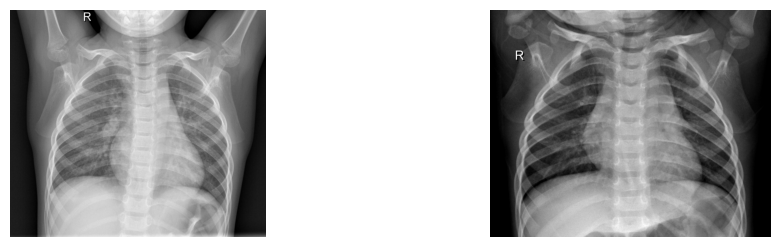

In [49]:
plt.figure(figsize=(10,5))

for i in range(2):
    plt.subplot(2,2,i+1)
    img = plt.imread(os.path.join(train_normal_dir, os.listdir(train_normal_dir)[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()

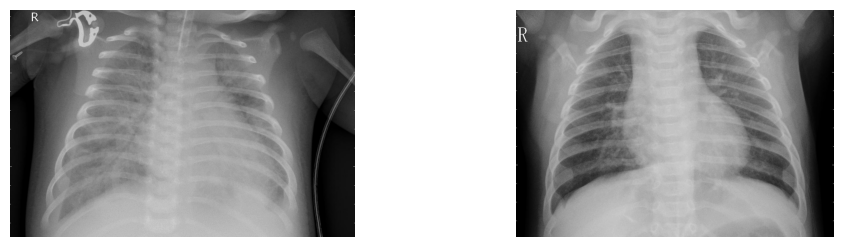

In [50]:
plt.figure(figsize=(10,5))

for i in range(2):
    plt.subplot(2,2,i+1)
    img = plt.imread(os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=45,
                                                      class_mode='binary',
                                                      target_size=(512, 512))

Found 5216 images belonging to 2 classes.


In [34]:
validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=45,
                                                                class_mode='binary',
                                                                target_size=(512, 512))

Found 624 images belonging to 2 classes.


In [17]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (512,512,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 255, 255, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 64)       

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  

In [20]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15


116/116 [==============================] - 977s 8s/step - loss: 0.4489 - accuracy: 0.8307 - val_loss: 0.6061 - val_accuracy: 0.7612
Epoch 2/15
116/116 [==============================] - 538s 5s/step - loss: 0.2501 - accuracy: 0.8984 - val_loss: 0.5444 - val_accuracy: 0.7788
Epoch 3/15
116/116 [==============================] - 620s 5s/step - loss: 0.2216 - accuracy: 0.9070 - val_loss: 0.3204 - val_accuracy: 0.8670
Epoch 4/15
116/116 [==============================] - 436s 4s/step - loss: 0.1932 - accuracy: 0.9227 - val_loss: 0.3534 - val_accuracy: 0.8686
Epoch 5/15
116/116 [==============================] - 445s 4s/step - loss: 0.1601 - accuracy: 0.9398 - val_loss: 0.5308 - val_accuracy: 0.8045
Epoch 6/15
116/116 [==============================] - 432s 4s/step - loss: 0.1573 - accuracy: 0.9365 - val_loss: 0.3152 - val_accuracy: 0.9006
Epoch 7/15
116/116 [==============================] - 438s 4s/step - loss: 0.1358 - accuracy: 0.9488 - val_loss: 0.3563 - val_accuracy: 0.90

In [66]:
test_dir = 'C:/Users/VANSH KHANEJA/Downloads/archive (34)/chest_xray/val/NORMAL'

print(os.listdir(test_dir))

for imgs in os.listdir(test_dir):
    img = load_img(test_dir+'/'+imgs,target_size = (512,512))
    x = img_to_array(img)
    x/=255
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(" is pneumonia\n\n")
    else:
        print(" not pneumonia\n\n")
    
  

    

['NORMAL2-IM-1427-0001.jpeg', 'NORMAL2-IM-1430-0001.jpeg', 'NORMAL2-IM-1431-0001.jpeg', 'NORMAL2-IM-1436-0001.jpeg', 'NORMAL2-IM-1437-0001.jpeg', 'NORMAL2-IM-1438-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg', 'NORMAL2-IM-1442-0001.jpeg']
1/1 [==============================] - 0s 85ms/step
[0.15862875]
 not pneumonia


1/1 [==============================] - 0s 82ms/step
[0.32883185]
 not pneumonia


1/1 [==============================] - 0s 84ms/step
[0.06637467]
 not pneumonia


1/1 [==============================] - 0s 90ms/step
[0.05429577]
 not pneumonia


1/1 [==============================] - 0s 87ms/step
[0.65908873]
 is pneumonia


1/1 [==============================] - 0s 85ms/step
[0.40195447]
 not pneumonia


1/1 [==============================] - 0s 88ms/step
[0.0705679]
 not pneumonia


1/1 [==============================] - 0s 92ms/step
[0.00706742]
 not pneumonia


